# Exploratory Data Analysis:
1. Import Libraries and Read Data
2. Look at each column in the training data - understand its purpose and importance
3. Expectation: What is my expectation about the variable influence on the 'SalePrice' 
4. Separate into numerical and categorical variables
5. Data Visualization of Numerical variables as Scatterplots
6. Data Visualization of Categorical variables as Boxplots
7. Heatmaps -- find multicollinearity 
8. top10 Heatmap - highly correlated with 'SalePrice' - remove multicollinear variables
9. Combine Train and Test
10. Handle Missingness
11. Target ('SalePrice') Analysis and log-Transformation
12. Feature Engineer (generate new features)
13. Dummify
14. Split back into Train and Test and Export Data into csv files

#### Import libraries and Read data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import StandardScaler

pd.set_option("display.max_columns", 500)
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('./data/train.csv', index_col = 'Id')
test_df = pd.read_csv('./data/test.csv', index_col = 'Id')

train = train_df.copy()
test = test_df.copy()
print('Dimensions of train data:', train.shape)
print('Dimensions of test data:', test.shape)

Dimensions of train data: (1460, 80)
Dimensions of test data: (1459, 79)


## Understanding Train Data:
Look at each variable and try to understand its meaning and relevance to this problem.

In [3]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### Expectation
Read the description of all the columns above, and one by one, ask the following questions:
1. Do we think about this variable when we are buying a house?
2. How important would be this variable? What would be the impact of this variable?
3. Is this information already described in any other variable?

#### Based on my expectations: the variables below should have the most influence on 'SalePrice'

OverallQual - Rates the overall material and finish of the house between 1 to 10

YearBuilt - Original construction date

TotalBsmtSF - Total square feet of basement area

GrLivArea - Above grade (ground) living area square feet

Neighborhood: Physical locations within Ames city limits

#### TYPE: categorize variables as 'categorical' versus 'numerical'

In [4]:
#update cat_features and num_features:
cat_features = train.dtypes[train.dtypes == 'object'].index
num_features = train.dtypes[train.dtypes != 'object'].index

print("%i is number of categorical features" %len(cat_features))
print("%i is number of numerical features" %len(num_features))

43 is number of categorical features
37 is number of numerical features


In [5]:
print("Categorical features:\n", cat_features)
print("Numerical features:\n", num_features)

Categorical features:
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Numerical features:
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath

#### Manually changing some of the "wrongly labeled" numerical features to categorical features

In [6]:
cat_add = ['MSSubClass', 'MoSold', 'YrSold', 'OverallQual', 'OverallCond']
train.loc[:, cat_add] = train.loc[:, cat_add].astype('object')

In [7]:
cat_features = train.dtypes[train.dtypes == 'object'].index
num_features = train.dtypes[train.dtypes != 'object'].index
print("%i is number of categorical features" %len(cat_features))
print("%i is number of numerical features" %len(num_features))

48 is number of categorical features
32 is number of numerical features


In [8]:
#train.loc[:, ['LotFrontage','Neighborhood']]

### Data Visualization for Train dataset

#### All Numerical features versus SalePrice
Examine the relationship of all the numerical features with SalePrice

In [9]:
num_features = train.dtypes[train.dtypes != 'object'].index
num_features = num_features.drop('SalePrice')
target = train.SalePrice

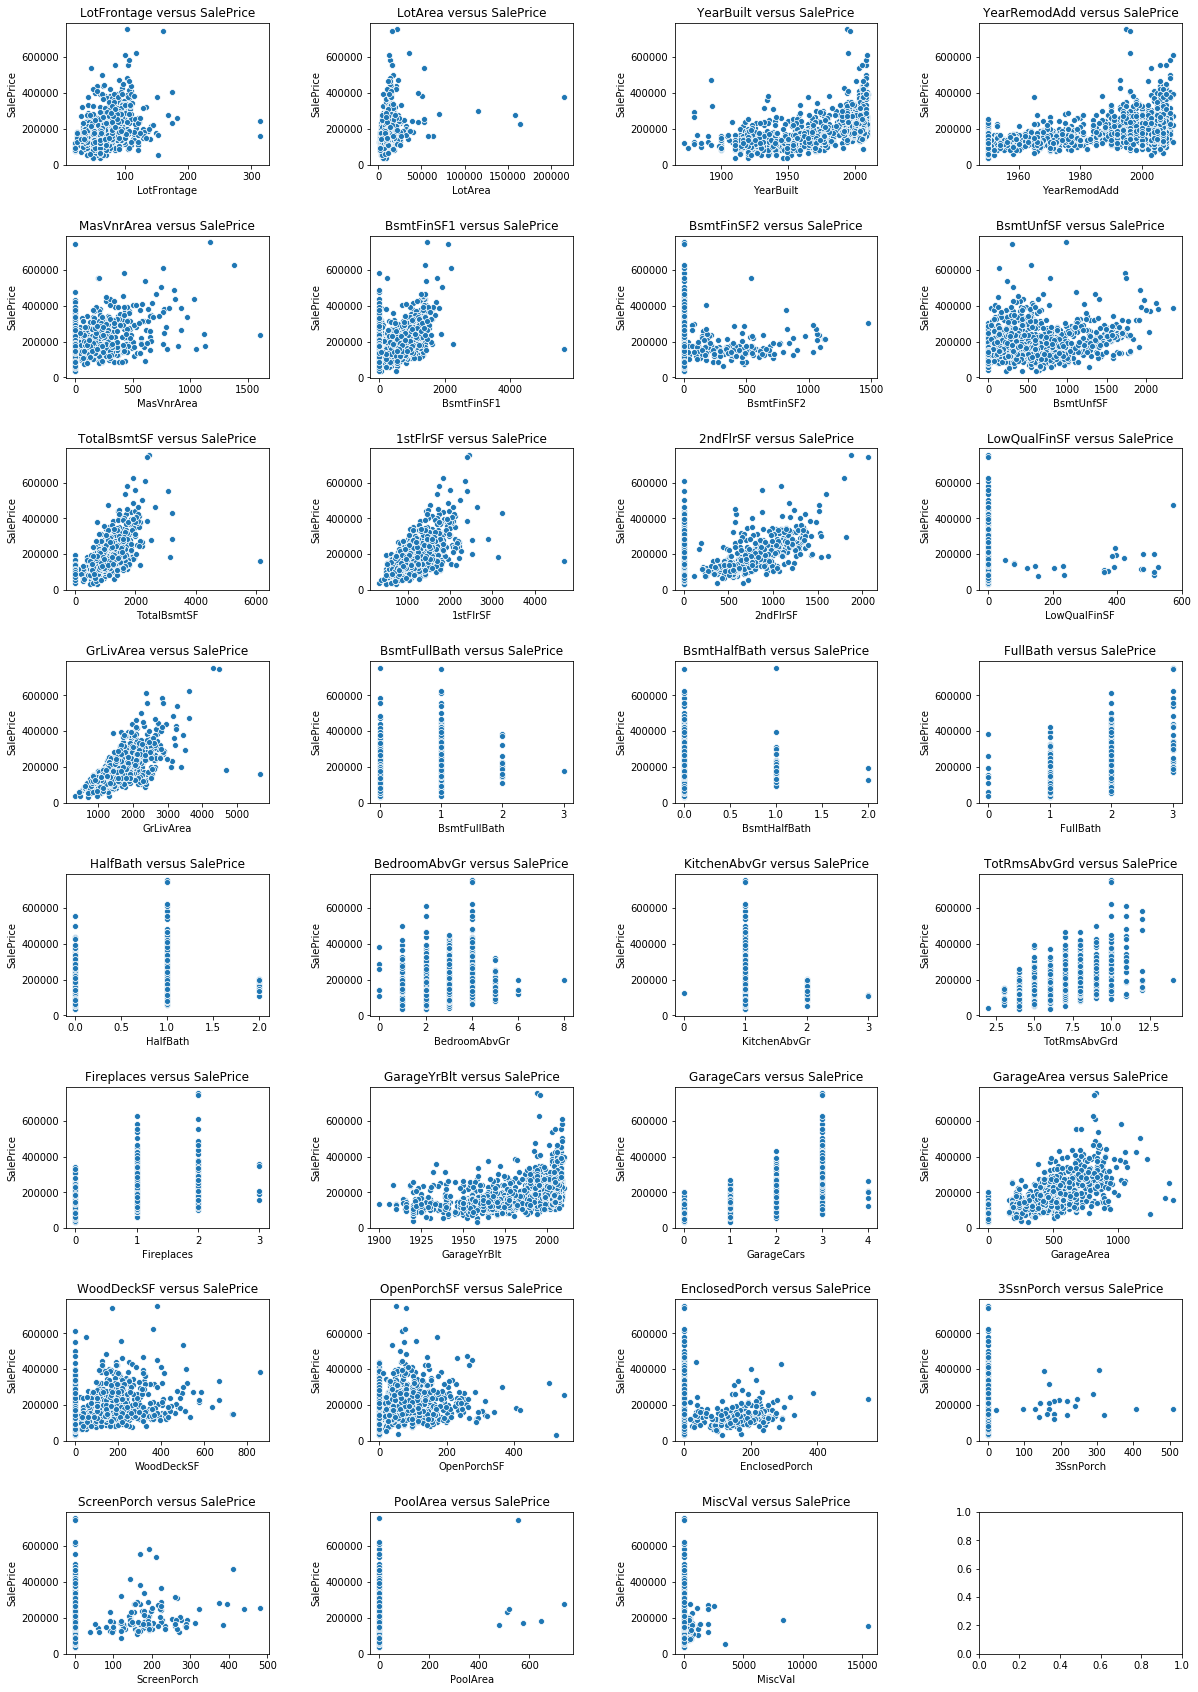

In [10]:
fig, ax = plt.subplots(8,4, figsize=(20,30),gridspec_kw={"hspace":0.5,"wspace":0.5})
for i,col in enumerate(num_features):
    sns.scatterplot(col,target,data=train[num_features],ax=ax[i//4,i%4])
    ax[i//4,i%4].set_xlabel(col)
    ax[i//4,i%4].set_title('{} versus SalePrice'.format(col))

#### All Categorical Features

In [11]:
cat_features = train.dtypes[train.dtypes == 'object'].index

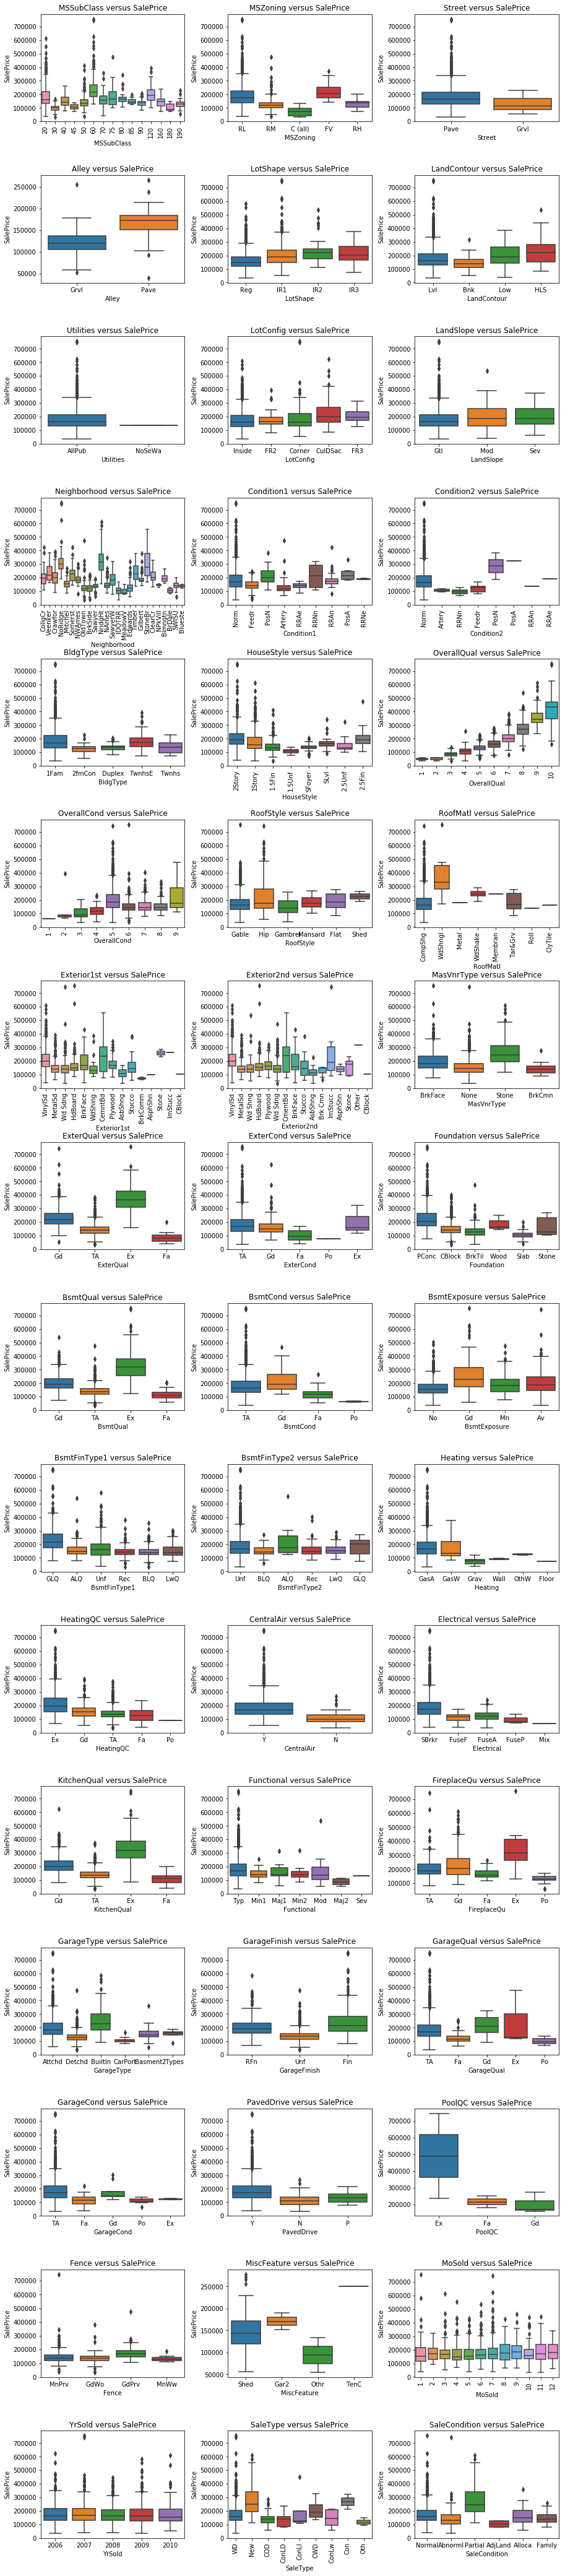

In [12]:
fig, ax = plt.subplots(16,3, figsize=(15,75),gridspec_kw={"hspace":0.5,"wspace":0.3})
for i, col in enumerate(cat_features):
    g = sns.boxplot(col,target,data=train[cat_features],ax=ax[i//3,i%3])
    ax[i//3,i%3].set_xlabel(col)
    ax[i//3,i%3].set_title('{} versus SalePrice'.format(col))
    if train[col].value_counts().shape[0] >= 8:
        g.set_xticklabels(g.get_xticklabels(), rotation=90)

#### Discovery: checking our expectations relationship with Target variable

OverallQual - (categorical) strong linear relationship (sort of exponential?) with 'SalePrice'

YearBuilt - (categorical) not a strong tendency but higher 'SalePrice' for recently built 

TotalBsmtSF - (numerical) strong exponential relationship with 'SalePrice' 

GrLivArea - (numerical) linear relationship with 'SalePrice' 

Neighborhood -  (categorical) hard to make any judgement in relation to 'SalePrice'


## Heatmaps and Correlation

#### Correlation in Numerical features:

In [13]:
num_corr = train_df.corr().abs().nlargest(len(num_features), 'SalePrice')['SalePrice']
num_corr

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
Name: SalePrice, dtype: float64

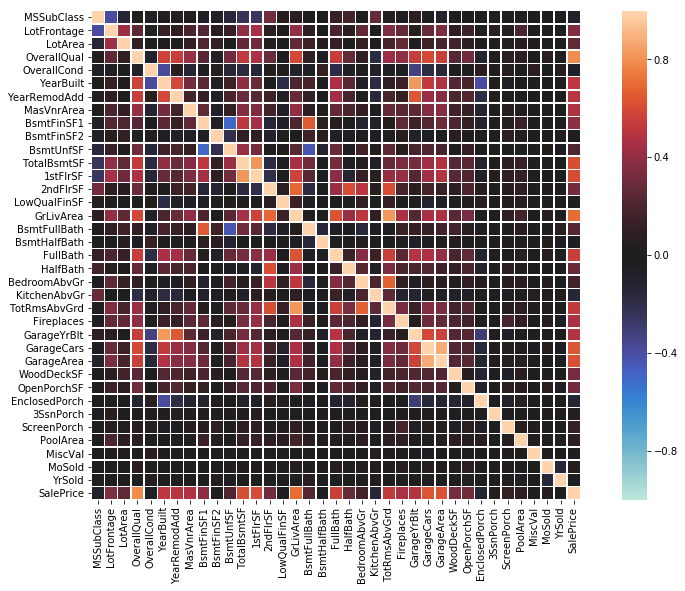

In [14]:
def plot_heatmap_all(df):
    fig, ax = plt.subplots(figsize=(15,9))
    sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, linewidths=0.5, square=True)
    
plot_heatmap_all(train_df)

#### Spot multicollinearity: 
Significant correlation between these variables
1. 'TotalBsmtSF' and '1stFlrSF' 
2. 'YearBuilt' and 'GarageYrBlt', 'GarageCars', 'GarageArea', 'YearRemodAdd'
3. 'GrLivArea' and 'TotRmsAbvGrd'
4. 'GarageCars' and 'GarageArea'

#### Examining the correlation with target variable 'SalePrice':
Alot of the variables are black and show no correlation with 'SalePrice' (color Black) just remove it!

Variables that have greater correlation with 'SalePrice' are shown below (zoomed in heatmap)

#### Plot top10 variables with highest correlation with 'SalePrice'

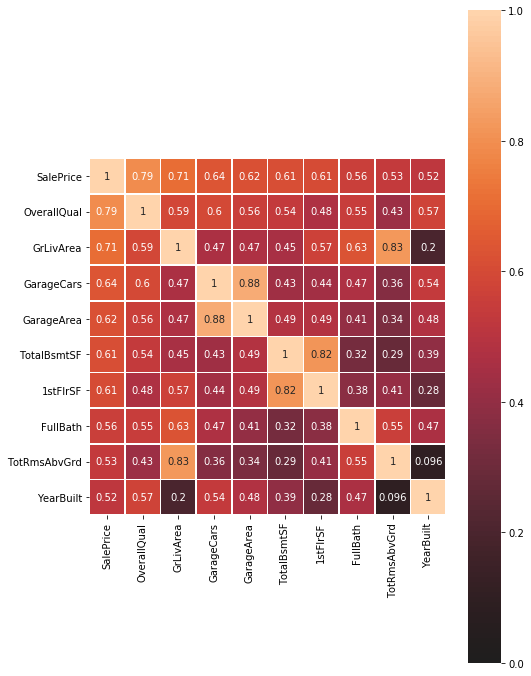

In [15]:
def plot_heatmap(df, ncount, target):
    cols = df.corr().abs().nlargest(ncount, target)[target].index
    cm = np.corrcoef(df[cols].values.T)
    fig, ax = plt.subplots(figsize=(8,12))
    sns.heatmap(cm, vmin=0, vmax=1, center=0, linewidths=0.5,
                annot=True, annot_kws={'size':10},square=True,
                xticklabels=cols.values, yticklabels=cols.values)
    plt.show()
    
plot_heatmap(train_df, 10, 'SalePrice')

#### Top10 correlation variables == check if multicollinear
1. 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'
2. 'GarageCars' and 'GarageArea' are strongly correlated variables. The number of cars that fit into the garage is a consequence of the garage area. Just need one of these variables in our analysis (keep 'GarageCars' since its correlation with 'SalePrice' is higher)
3. 'TotalBsmtSF' and '1stFloor' are strongly correlated variables. Just need one of these variables in our analysis (keep 'TotalBsmtSF').
4. 'FullBath' is slightly correlated with 'SalePrice'
5. 'GrLivArea' and 'TotRmsAbvGrd' are strongly correlated variables. Keep 'GrLivArea'
6. 'YearBuilt' is slightly correlated with 'SalePrice'

#### Scatterplot between all these variables:

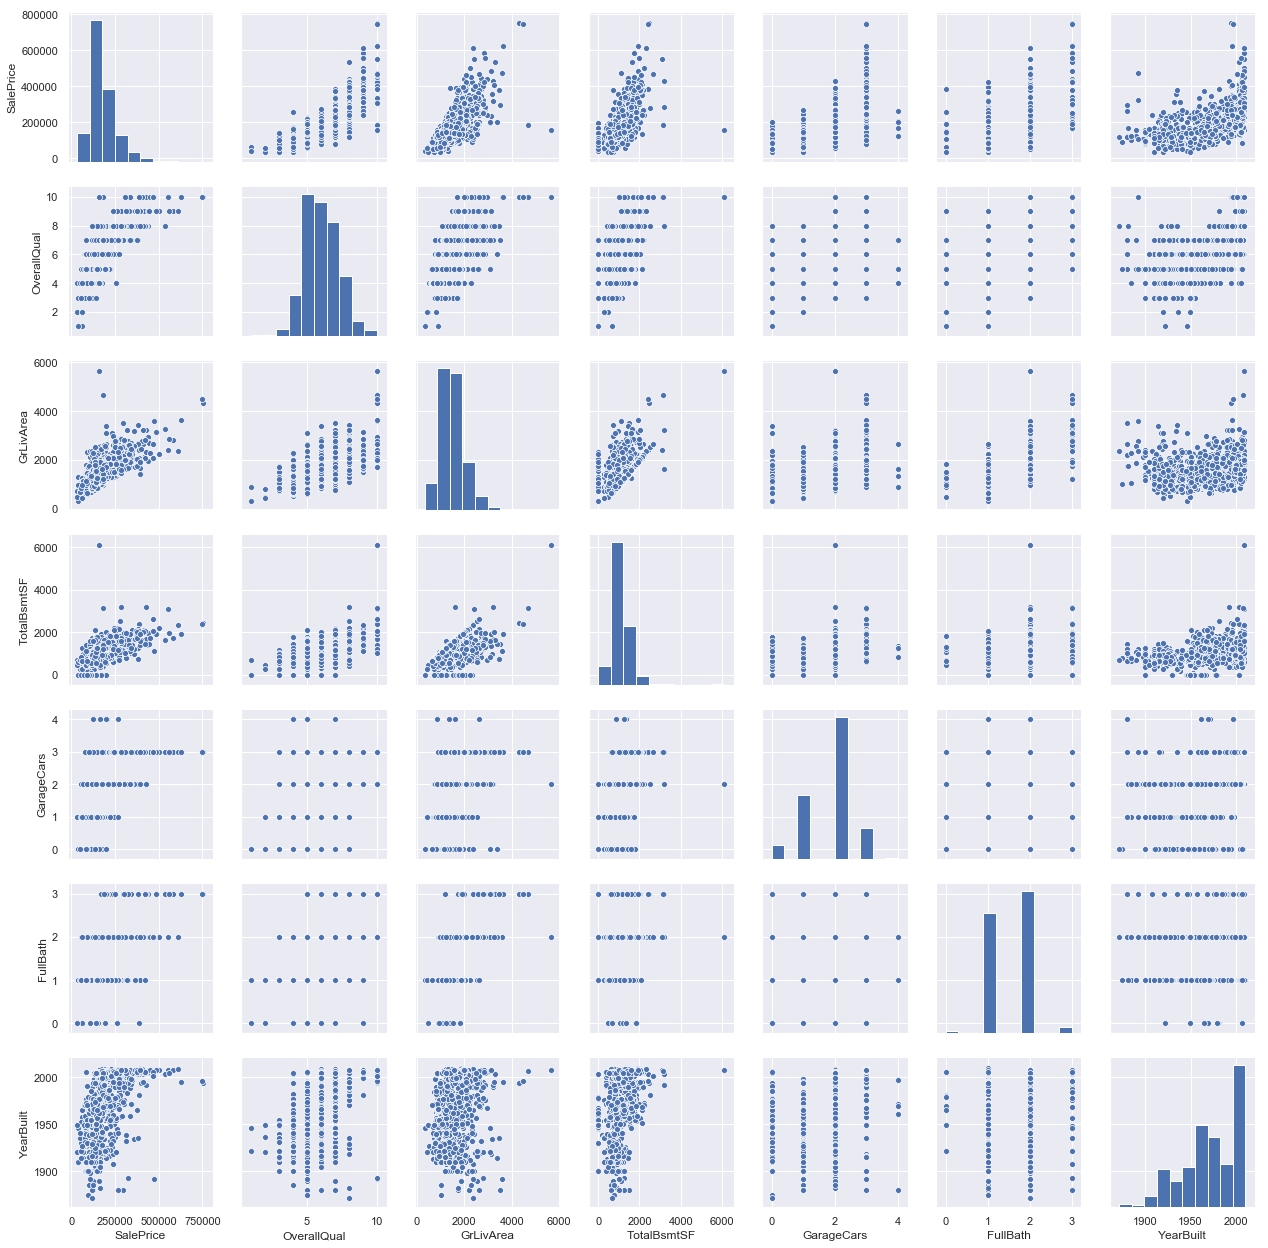

In [16]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], size = 2.5)
plt.show()

#### Observations based on the above scatter plot
1. 'TotalBsmtSF' and 'GrLiveArea': dots draw a linear line, which almost acts like a border. This is intuitive since majority of the dots stay below that line. Basement areas can be equal to the above ground living area; however, basement areas can never be bigger than above ground living area.
2. 'SalePrice' and 'YearBuilt': appears to be an exponential function, which almost acts like a border or 'upper limit' of the dots below meaning that prices are increasing faster as the years increase.

## Outliers

#### outlier in 'GrLivArea' vs 'SalePrice'

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


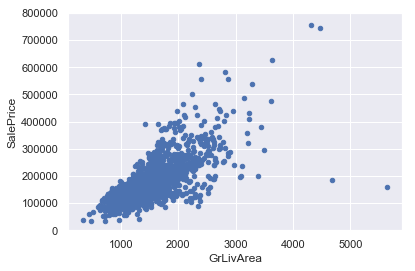

In [17]:
var = 'GrLivArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

The two values with bigger 'GrLivArea' seem strange and do not follow the trend. Remove the two datapoints with id 524 and id 1299

In [18]:
outliers_1 = (train.GrLivArea > 4000) & (train.SalePrice < 300000)
train[outliers_1][['GrLivArea']]

,GrLivArea
Id,
524,4676
1299,5642


In [19]:
train = train[~outliers_1]

In [20]:
print('Dimensions of train data:', train.shape)

Dimensions of train data: (1458, 80)


#### outlier in test dataset: GarageYrBlt (greater than year 2019) - impute with YearBuilt

In [21]:
outlier_2 = test.GarageYrBlt == 2207
test[outlier_2][['YearBuilt', 'GarageYrBlt']]

,YearBuilt,GarageYrBlt
Id,,
2593,2006,2207.0


In [22]:
test.loc[outlier_2,['GarageYrBlt']] = test.loc[outlier_2, 'YearBuilt']

## Combine Train and Test 

In [23]:
df = pd.concat([train, test], axis=0)
display(df.dtypes.value_counts())
print('Dimensions of df:', df.shape)

object     48
int64      20
float64    12
dtype: int64

Dimensions of df: (2917, 80)


## Missingness

In [24]:
pd.DataFrame({'count': df.count(), 'unique': df.nunique(), 'missing': df.isnull().sum()}).sort_values(by=['missing'],ascending=False).head(35)

,count,unique,missing
PoolQC,9,3,2908
MiscFeature,105,4,2812
Alley,198,2,2719
Fence,571,4,2346
SalePrice,1458,662,1459
FireplaceQu,1497,5,1420
LotFrontage,2431,128,486
GarageQual,2758,5,159
GarageFinish,2758,3,159
GarageCond,2758,5,159


#### Impute with "None" when NaN means something:
- Alley: no alley access
- BsmtQual/ BsmtCond/ BsmtExposure/ BsmtFinType1/ BsmtFinType2: no basement
- FireplaceQu: no fireplace
- GarageType/ GarageFinish/ GarageQual/ GarageCond: no garage
- PoolQC: no pool
- Fence: no fence
- MasVnrType: no masonry veneer type
- MiscFeature: no miscellaneous feature

In [25]:
def imputeNone(df_input):
    df = df_input.copy()
    df.Alley = df.Alley.fillna("None")
    df.BsmtQual = df.BsmtQual.fillna("None")
    df.BsmtCond = df.BsmtCond.fillna("None")
    df.BsmtExposure = df.BsmtExposure.fillna("None")
    df.BsmtFinType1 = df.BsmtFinType1.fillna("None")
    df.BsmtFinType2 = df.BsmtFinType2.fillna("None")
    df.FireplaceQu = df.FireplaceQu.fillna("None")
    df.GarageType = df.GarageType.fillna("None")
    df.GarageFinish = df.GarageFinish.fillna("None")
    df.GarageQual = df.GarageQual.fillna("None")
    df.GarageCond = df.GarageCond.fillna("None")
    df.PoolQC = df.PoolQC.fillna("None")
    df.Fence = df.Fence.fillna("None")
    df.MasVnrType = df.MasVnrType.fillna("None")
    df.MiscFeature = df.MiscFeature.fillna("None")
    return(df)

In [26]:
def imputeMode(df_input):
    df = df_input.copy()
    impute_df =  df.loc[:, ['Electrical', 'KitchenQual','Functional', 'Exterior1st','Exterior2nd', 'SaleType','MSZoning','Utilities', 'GarageCars']]
    for i in impute_df.columns:
        df[i].fillna(df[i].mode()[0], inplace=True)
    return(df)

#### Impute BsmtSF to be zero since there is NO basement

In [27]:
df_new = imputeNone(df)
df_noBsmt = df_new.loc[df_new.BsmtQual=='None', ['BsmtQual','BsmtFullBath','BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]
df_noBsmt[df_noBsmt.TotalBsmtSF!= 0.0]

,BsmtQual,BsmtFullBath,BsmtHalfBath,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,
2121,None,NaN,NaN,NaN,NaN,NaN,NaN
2218,None,0.0,0.0,0.0,0.0,173.0,173.0
2219,None,0.0,0.0,0.0,0.0,356.0,356.0


In [28]:
def imputeZeros(df_input):
    df = df_input.copy()
    impute_df = df.loc[:, ['BsmtQual','BsmtFullBath','BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]
    for i in impute_df.columns:
        df[i].fillna(0, inplace=True)
    return(df)

In [29]:
def imputeMean(df_input):
    df = df_input.copy()
    impute_df =  df.loc[:, ['GarageYrBlt', 'GarageArea', 'MasVnrArea']]
    for i in impute_df.columns:
        df[i].fillna(np.mean(df[i]), inplace=True)
    return(df)

In [30]:
def imputeMissingness(df_input):
    df = df_input.copy()
    df = imputeNone(df)
    df = imputeMode(df)
    
    #impute 0 for all Bsmt columns when no basement:
    df.loc[[2218,2219], ['BsmtUnfSF', 'TotalBsmtSF']] = 0
    df.loc[[2121],['BsmtFullBath','BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']] = 0
    
    df = imputeZeros(df)
    df = imputeMean(df)
    
    df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(x.median()))
    return(df)

In [31]:
df = imputeMissingness(df)
df.isnull().sum().sort_values(ascending=False).head(10) #check for missingness

SalePrice      1459
Electrical        0
ExterCond         0
ExterQual         0
Exterior1st       0
Exterior2nd       0
Fence             0
FireplaceQu       0
Fireplaces        0
Foundation        0
dtype: int64

## Univariable Study: focus on dependent variable
### Analysing Target variable: 'SalePrice'

In [32]:
#num_features = df.select_dtypes(include=['int','float','int64','float64']).columns
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#df[num_features] = scaler.fit_transform(df[num_features])

In [33]:
train['SalePrice'].describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'Probability Distribution Function of SalePrice')

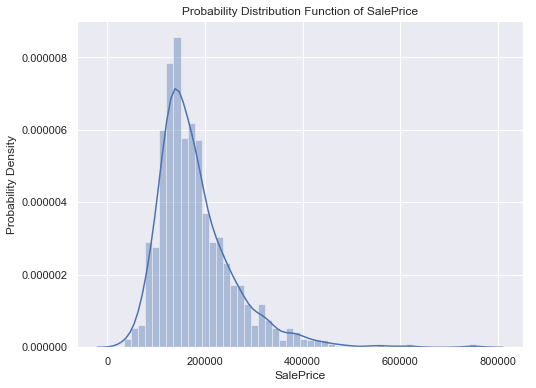

In [34]:
plt.figure(figsize = (8,6))
sns.distplot(train.SalePrice, bins=50)
plt.ylabel('Probability Density')
plt.title('Probability Distribution Function of SalePrice')

In [35]:
print("Skewness: %f" % train['SalePrice'].skew()) #skewness
print("Kurtosis: %f" % train['SalePrice'].kurt()) #kurtosis

Skewness: 1.881296
Kurtosis: 6.523067


mu: 180932.919067 and sigma: 79467.788930


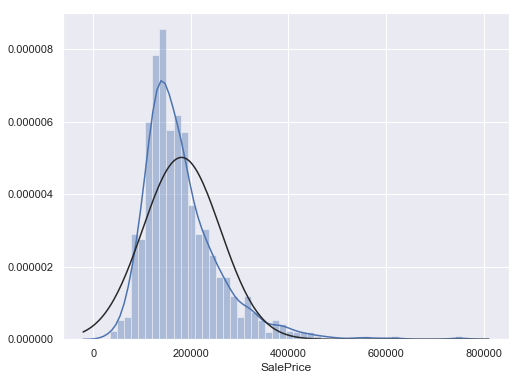

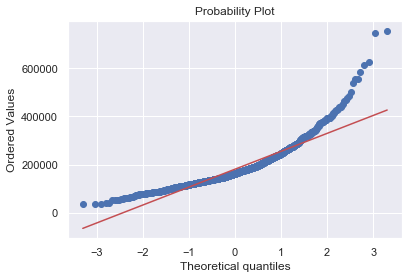

In [36]:
plt.figure(figsize = (8,6))
sns.distplot(train.SalePrice, bins=50, fit=stats.norm)

(mean,std) = stats.norm.fit(train.SalePrice)
print('mu: %f and sigma: %f' %(mean,std))

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

The Target variable, 'SalePrice', deviates from the normal distribution. It shows 'peakedness', 'positive skewness' and does not follow the diagonal line.

#### Target transformation:

mu: 12.024009 and sigma: 0.399578


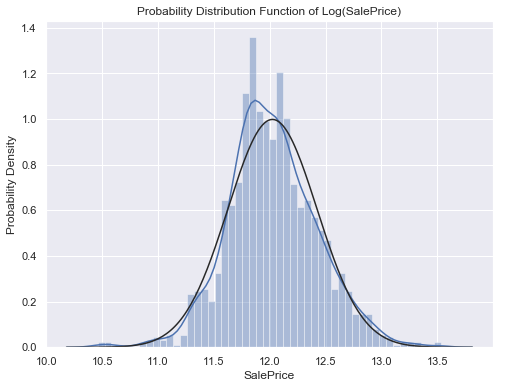

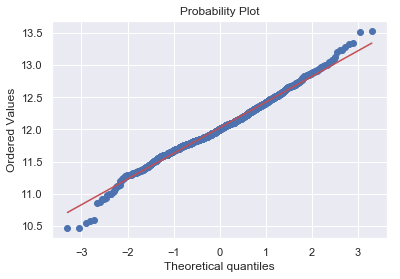

In [37]:
train.SalePrice = np.log(train.SalePrice)

plt.figure(figsize=(8,6))
sns.distplot(train.SalePrice, bins=50, fit=stats.norm)
(mean,std) = stats.norm.fit(train.SalePrice)
print('mu: %f and sigma: %f' %(mean,std))
plt.ylabel('Probability Density')
plt.title('Probability Distribution Function of Log(SalePrice)')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

## Feature Engineering

In [38]:
#TotalBsmtSF = BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF
df.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace=True)

In [39]:
#GrLivArea = 1stFlrSF + 2ndFlrSF + LowQualFinSF
df.drop(['1stFlrSF','2ndFlrSF','LowQualFinSF'], axis=1, inplace=True)

In [40]:
#TotalPorchSF = OpenPorchSF + EnclosedPorch + 3SsnPorch + ScreenPorch + WoodDeckSF
df.drop(['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','WoodDeckSF'], axis=1, inplace=True)

In [41]:
#df['TotalBath'] = df['FullBath'] + (0.5*df['HalfBath']) + df['BsmtFullBath'] + (0.5*df['BsmtHalfBath'])

In [42]:
df.shape

(2917, 69)

## Dummify

In [43]:
nom_cols = ('MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating','CentralAir', 'Electrical', 'Functional', 'GarageType', 
       'Fence', 'MiscFeature','SaleType', 'SaleCondition', 'MSSubClass', 'MoSold', 'YrSold')

In [44]:
ord_cols = ('ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
            'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
            'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC')

In [45]:
enc_dict = {'Ex':10, 'Gd':8, 'TA':6, 'Fa':4, 'Po':2, 'None':0,
            'Av':6, 'Mn':4, 'No':2, 
            'GLQ':10, 'ALQ':8, 'Rec':8, 'BLQ':6, 'LwQ':4, 'Unf':2,
            'Fin':10, 'RFn':6, 'Unf':2,
            'Y':10, 'P':6, 'N':2}

In [46]:
for c in ord_cols:
    df[c] = list(map(lambda x: enc_dict.get(x), df[c]))

In [47]:
#cat = df.dtypes[df.dtypes == 'object'].index
#len(cat)

In [48]:
df = pd.get_dummies(df, drop_first=True)

In [49]:
df.sample(5)

,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,ExterCond,ExterQual,FireplaceQu,Fireplaces,FullBath,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageYrBlt,GrLivArea,HalfBath,HeatingQC,KitchenAbvGr,KitchenQual,LotArea,LotFrontage,MasVnrArea,MiscVal,PavedDrive,PoolArea,PoolQC,SalePrice,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YearRemodAdd,Alley_None,Alley_Pave,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod,LandSlope_Sev,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

### Split Dataframes back to Train and Test

In [50]:
train = df[df.SalePrice.notnull()]
test = df[df.SalePrice.isnull()]
#train = train.reset_index()
#test = test.reset_index()
print('Dimensions of train data:', train.shape)
print('Dimensions of test data:', test.shape)

Dimensions of train data: (1458, 244)
Dimensions of test data: (1459, 244)


#### Export Data

In [51]:
train.to_csv('./data/train_cleaned.csv')
test.to_csv('./data/test_cleaned.csv')